# Inkredo Challenge

In [1]:
import pandas as pd
import time
import datetime as dt
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
dateparse = lambda x: pd.datetime.strptime(x,'%Y%m%d-%H-%M%S')
pd.set_option('display.precision',3)
df=pd.read_csv("events_log.csv",parse_dates=['timestamp'], date_parser=dateparse)
df.head()

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
0,00000736167c507e8ec225bd9e71f9e5,2016-03-01 10:38:42,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
1,00000c69fe345268935463abbfa5d5b3,2016-03-07 00:52:26,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
2,00003bfdab715ee59077a3670331b787,2016-03-02 14:53:05,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
3,0000465cd7c35ad2bdeafec953e08c1a,2016-03-02 22:27:01,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
4,000050cbb4ef5b42b16c4d2cf69e6358,2016-03-02 09:50:23,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


In [3]:
df["date"]=df["timestamp"].dt.date

In [4]:
df.head()

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position,date
0,00000736167c507e8ec225bd9e71f9e5,2016-03-01 10:38:42,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN,2016-03-01
1,00000c69fe345268935463abbfa5d5b3,2016-03-07 00:52:26,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN,2016-03-07
2,00003bfdab715ee59077a3670331b787,2016-03-02 14:53:05,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN,2016-03-02
3,0000465cd7c35ad2bdeafec953e08c1a,2016-03-02 22:27:01,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0,2016-03-02
4,000050cbb4ef5b42b16c4d2cf69e6358,2016-03-02 09:50:23,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN,2016-03-02


## Daily overall clickthrough rate

In [6]:
df3=pd.DataFrame({'count' : df[df["action"]=="searchResultPage"].groupby(["date","group","session_id"]).size()}).reset_index()
Vals=df3.groupby(["date"]).size().tolist()
df2=pd.DataFrame({'count' : df[df["action"]=="visitPage"].groupby(["date","group","session_id"]).size()}).reset_index()
df3=pd.DataFrame({'Clicked' : df2.groupby(["date"]).size()}).reset_index()
df3["Total"]=Vals

In [8]:
df3["click_through_rate"]=df3["Clicked"]/df3["Total"]
df3

,date,Clicked,Total,click_through_rate
0,2016-03-01,3524,9244,0.381
1,2016-03-02,3602,9198,0.392
2,2016-03-03,3626,9339,0.388
3,2016-03-04,3287,8241,0.399
4,2016-03-05,2573,6724,0.383
5,2016-03-06,2968,7637,0.389
6,2016-03-07,3747,9531,0.393
7,2016-03-08,3140,8075,0.389


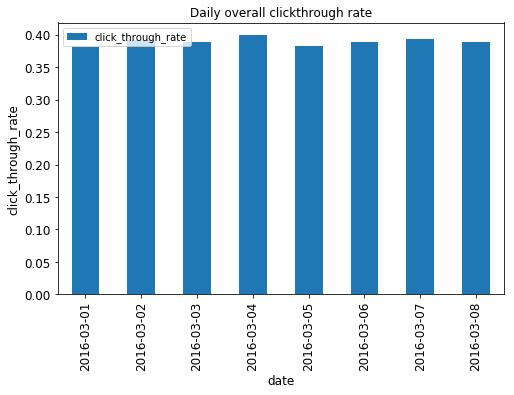

In [11]:
ax = df3[["date","click_through_rate"]].plot.bar(x="date",y="click_through_rate",title ="Daily overall clickthrough rate", figsize=(8, 5), legend=True, fontsize=12)
ax.set_xlabel("date", fontsize=12)
ax.set_ylabel("click_through_rate",fontsize=12)
plt.show()

## Variation between the groups

         date  Clicked  Total  click_through_rate
0  2016-03-01     2825   4208               0.671
1  2016-03-02     2877   4215               0.683
2  2016-03-03     2844   4202               0.677
3  2016-03-04     2374   3513               0.676
4  2016-03-05     1764   2730               0.646
5  2016-03-06     2114   3140               0.673
6  2016-03-07     2648   4028               0.657
7  2016-03-08     2275   3420               0.665


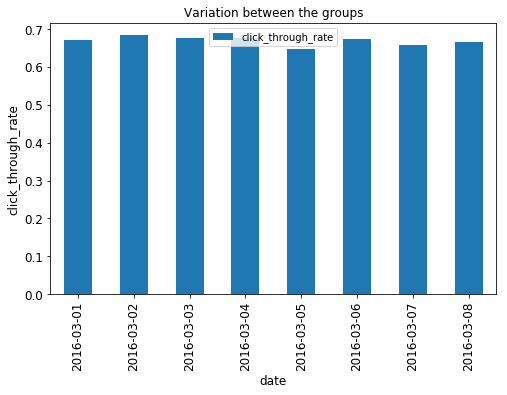

In [12]:
dfA=df[df["group"]=="a"]
dfB=df[df["group"]=="b"]
df3=pd.DataFrame({'count' : dfA[dfA["action"]=="searchResultPage"].groupby(["date","group","session_id"]).size()}).reset_index()
Vals=df3.groupby(["date"]).size().tolist()
df2=dfA[dfA["action"]=="visitPage"].groupby(["date","group","session_id"]).size()
df3A=pd.DataFrame({'Clicked' : df2.groupby(["date"]).size()}).reset_index()
df3A["Total"]=Vals
df3A["click_through_rate"]=df3A["Clicked"]/df3A["Total"]
print df3A
ax = df3A[["date","click_through_rate"]].plot.bar(x="date",y="click_through_rate", title ="Variation between the groups", figsize=(8, 5), legend=True, fontsize=12)
ax.set_xlabel("date", fontsize=12)
ax.set_ylabel("click_through_rate",fontsize=12)
plt.show()

         date  Clicked  Total  click_through_rate
0  2016-03-01      699   5036               0.139
1  2016-03-02      725   4983               0.145
2  2016-03-03      782   5137               0.152
3  2016-03-04      913   4728               0.193
4  2016-03-05      809   3994               0.203
5  2016-03-06      854   4497               0.190
6  2016-03-07     1099   5503               0.200
7  2016-03-08      865   4655               0.186


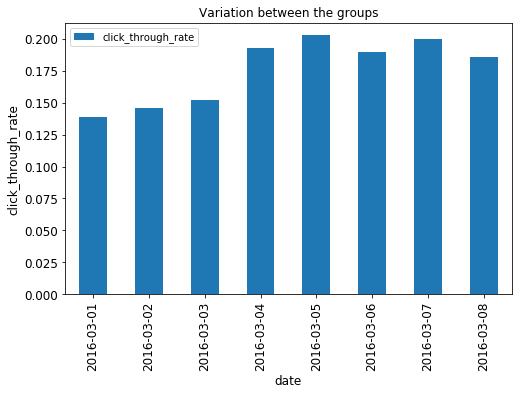

In [13]:
df3=pd.DataFrame({'count' : dfB[dfB["action"]=="searchResultPage"].groupby(["date","group","session_id"]).size()}).reset_index()
Vals=df3.groupby(["date"]).size().tolist()
df2=dfB[dfB["action"]=="visitPage"].groupby(["date","group","session_id"]).size()
df3B=pd.DataFrame({'Clicked' : df2.groupby(["date"]).size()}).reset_index()
df3B["Total"]=Vals
df3B["click_through_rate"]=df3B["Clicked"]/df3B["Total"]
print df3B
ax = df3B[["date","click_through_rate"]].plot.bar(x="date",y="click_through_rate", title ="Variation between the groups", figsize=(8, 5), legend=True, fontsize=12)
ax.set_xlabel("date", fontsize=12)
ax.set_ylabel("click_through_rate",fontsize=12)
plt.show()

## Which results do people tend to try first? 

Assuming that the pages would be opened first would be early in time

In [14]:
df3=pd.DataFrame({'count' : dfA[dfA["action"]=="searchResultPage"].groupby(["date","group","session_id"]).size()}).reset_index()
Vals=df3.groupby(["date"]).size().tolist()

In [15]:
temp=pd.DataFrame({'count' : df.groupby(["date","timestamp","session_id","result_position"]).size()}).reset_index()
temp=temp.sort_values(by="timestamp",ascending=True)
Counts=pd.value_counts(list(temp[["session_id","result_position"]].groupby(['session_id']).first().values))
Counts[:1]

[1.0]    17726
dtype: int64

We can see people open mostly the first page search Results

## How does it change day-to-day?

In [16]:
temp=pd.DataFrame({'count' : df.groupby(["date","timestamp","session_id","result_position"]).size()}).reset_index()
temp=temp.sort_values(by="timestamp",ascending=True)
temp=temp[["date","session_id","result_position"]].groupby(["date",'session_id']).first()
#[["date","result_position"]].groupby("date").agg(lambda x:x.value_counts().index[0])
#temp=temp.to_frame()
temp = temp.reset_index()
temp[["date","result_position"]].groupby("date").agg(lambda x:x.value_counts().index[0])

,result_position
date,
2016-03-01,1.0
2016-03-02,1.0
2016-03-03,1.0
2016-03-04,1.0
2016-03-05,1.0
2016-03-06,1.0
2016-03-07,1.0
2016-03-08,1.0


# What is their daily overall zero results rate? 

In [17]:
df3=pd.DataFrame({'count' : df[df["action"]=="searchResultPage"].groupby(["date","group","n_results"]).size()}).reset_index()
df2=df3[df3["n_results"]==0]

#print Counter(df3.groupby(["date","group","n_results"]).size().values.tolist())
#print df3
df4=df3[["date","group","count"]].groupby(["date","group"]).sum().reset_index()
#df2
#print df4#df3[["date","group","count"]].groupby(["date","group"]).sum()
#print df2
df2["Total"]=df4["count"].tolist()
print df2
df2[["date","Total","count"]].groupby("date").sum()

           date group  n_results  count  Total
0    2016-03-01     a        0.0   2350  12582
32   2016-03-01     b        0.0   1097   5792
55   2016-03-02     a        0.0   2524  13209
88   2016-03-02     b        0.0   1065   5693
112  2016-03-03     a        0.0   2371  13280
152  2016-03-03     b        0.0   1072   5879
173  2016-03-04     a        0.0   2068  11298
209  2016-03-04     b        0.0    947   5377
233  2016-03-05     a        0.0   1535   8612
271  2016-03-05     b        0.0    907   4592
293  2016-03-06     a        0.0   1599   9469
325  2016-03-06     b        0.0    975   5143
347  2016-03-07     a        0.0   2316  12699
384  2016-03-07     b        0.0   1144   6312
406  2016-03-08     a        0.0   2139  10907
439  2016-03-08     b        0.0   1018   5390


c:\python27\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Total,count
date,,
2016-03-01,18374,3447
2016-03-02,18902,3589
2016-03-03,19159,3443
2016-03-04,16675,3015
2016-03-05,13204,2442
2016-03-06,14612,2574
2016-03-07,19011,3460
2016-03-08,16297,3157


         date  Total  count   Rate
0  2016-03-01  18374   3447  0.188
1  2016-03-02  18902   3589  0.190
2  2016-03-03  19159   3443  0.180
3  2016-03-04  16675   3015  0.181
4  2016-03-05  13204   2442  0.185
5  2016-03-06  14612   2574  0.176
6  2016-03-07  19011   3460  0.182
7  2016-03-08  16297   3157  0.194


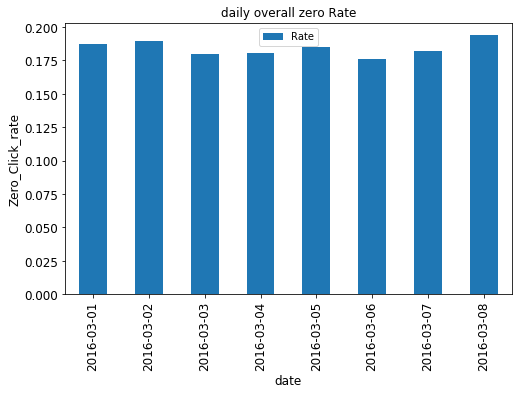

In [19]:
Res1=df2[["date","Total","count"]].groupby("date").sum().reset_index()
Res1["Rate"]=Res1["count"]/Res1["Total"]
print Res1
ax = Res1[["date","Rate"]].plot.bar(x="date",y="Rate", title ="daily overall zero Rate", figsize=(8, 5), legend=True, fontsize=12)
ax.set_xlabel("date", fontsize=12)
ax.set_ylabel("Zero_Click_rate",fontsize=12)
plt.show()

## How does it vary between the groups?

In [20]:
df2["Rate"]=df2["count"]/df2["Total"]
print df2[df2["group"]=="a"]
print df2[df2["group"]=="b"]

           date group  n_results  count  Total   Rate
0    2016-03-01     a        0.0   2350  12582  0.187
55   2016-03-02     a        0.0   2524  13209  0.191
112  2016-03-03     a        0.0   2371  13280  0.179
173  2016-03-04     a        0.0   2068  11298  0.183
233  2016-03-05     a        0.0   1535   8612  0.178
293  2016-03-06     a        0.0   1599   9469  0.169
347  2016-03-07     a        0.0   2316  12699  0.182
406  2016-03-08     a        0.0   2139  10907  0.196
           date group  n_results  count  Total   Rate
32   2016-03-01     b        0.0   1097   5792  0.189
88   2016-03-02     b        0.0   1065   5693  0.187
152  2016-03-03     b        0.0   1072   5879  0.182
209  2016-03-04     b        0.0    947   5377  0.176
271  2016-03-05     b        0.0    907   4592  0.198
325  2016-03-06     b        0.0    975   5143  0.190
384  2016-03-07     b        0.0   1144   6312  0.181
439  2016-03-08     b        0.0   1018   5390  0.189


c:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


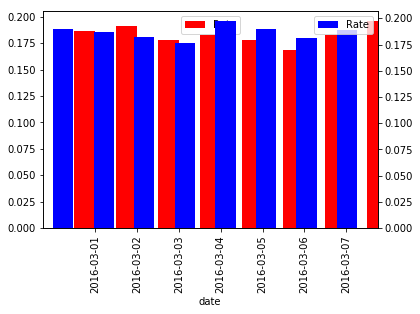

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
df2[df2["group"]=="a"].plot.bar(x="date",y="Rate", color = 'red', ax = ax , position = 1)
df2[df2["group"]=="b"].plot.bar(x="date",y="Rate", color = 'blue', ax = ax2 , position = 2)
ax.set_ylabel= ('Rate1')
ax2.set_ylabel=('Rate2')
plt.show()

## Relation between Session Length and Number of Results


In [30]:
Results=df[["session_id","n_results"]].groupby("session_id").sum().reset_index()
Results.head()

,session_id,n_results
0,0000cbcb67c19c45,20.0
1,0001382e027b2ea4,18.0
2,0001e8bb90445cb2,20.0
3,000216cf18ae1ab1,120.0
4,000527f711d50dfc,1.0


### Get Session Length

In [37]:
First=df.groupby("session_id").first().reset_index()
Second=df.groupby("session_id").last().reset_index()
len(Second)

68028

In [44]:
First.head()
cols=list(First.columns.values)
cols.remove("timestamp")
print cols

['session_id', 'uuid', 'group', 'action', 'checkin', 'page_id', 'n_results', 'result_position', 'date']


In [36]:
First=First.rename(columns = {'timestamp':'timestamp1'})
First.head()
len(First)

68028

In [47]:
final=pd.merge(First, Second, on='session_id', how='inner')

In [48]:
len(final)

68028

In [61]:
final["Session_time"]=abs(pd.to_datetime(final["timestamp_y"]) -pd.to_datetime(final["timestamp_x"])).astype('timedelta64[s]')

In [62]:
final.head()

,session_id,uuid_x,timestamp_x,group_x,action_x,checkin_x,page_id_x,n_results_x,result_position_x,date_x,uuid_y,timestamp_y,group_y,action_y,checkin_y,page_id_y,n_results_y,result_position_y,date_y,Session_time
0,0000cbcb67c19c45,e6f9280c8df5536490eb925a91979a3b,2016-03-03 15:20:45,b,searchResultPage,NaN,fdeeb9aaf0130d41,20.0,NaN,2016-03-03,e6f9280c8df5536490eb925a91979a3b,2016-03-03 15:20:45,b,searchResultPage,NaN,fdeeb9aaf0130d41,20.0,NaN,2016-03-03,0.0
1,0001382e027b2ea4,02c169fd24ec55daabd49351160c10e7,2016-03-07 08:53:58,b,checkin,240.0,f88793c95e778898,18.0,1.0,2016-03-07,fb0ae5ac2e505df28984feb1f6774172,2016-03-07 08:50:58,b,checkin,60.0,f88793c95e778898,18.0,1.0,2016-03-07,180.0
2,0001e8bb90445cb2,1eaa372a5f5258b18e49432d557d218e,2016-03-05 09:29:30,b,checkin,300.0,35ee99beb4fb05f0,20.0,1.0,2016-03-05,fa83888a4fa15cea98c8c2973768b675,2016-03-05 09:24:40,b,checkin,10.0,35ee99beb4fb05f0,20.0,1.0,2016-03-05,290.0
3,000216cf18ae1ab1,56de2bdd4ca05ad3a3bab8402c1a4aea,2016-03-08 16:20:38,a,searchResultPage,NaN,073960884b538560,20.0,NaN,2016-03-08,f69cc8cb90bb51bfae9978b065ca8310,2016-03-08 16:20:43,a,searchResultPage,NaN,044c957ac8a03a55,20.0,NaN,2016-03-08,5.0
4,000527f711d50dfc,3c9fbe30679a52c980ef097ff9b40257,2016-03-08 05:33:00,b,searchResultPage,NaN,41a14a053b06af6c,1.0,NaN,2016-03-08,3c9fbe30679a52c980ef097ff9b40257,2016-03-08 05:33:00,b,searchResultPage,NaN,41a14a053b06af6c,1.0,NaN,2016-03-08,0.0


In [68]:
final2=pd.merge(final, Results, on='session_id', how='inner')
len(final2)

68028

In [69]:
final2.head()

,session_id,uuid_x,timestamp_x,group_x,action_x,checkin_x,page_id_x,n_results_x,result_position_x,date_x,...,timestamp_y,group_y,action_y,checkin_y,page_id_y,n_results_y,result_position_y,date_y,Session_time,n_results
0,0000cbcb67c19c45,e6f9280c8df5536490eb925a91979a3b,2016-03-03 15:20:45,b,searchResultPage,NaN,fdeeb9aaf0130d41,20.0,NaN,2016-03-03,...,2016-03-03 15:20:45,b,searchResultPage,NaN,fdeeb9aaf0130d41,20.0,NaN,2016-03-03,0.0,20.0
1,0001382e027b2ea4,02c169fd24ec55daabd49351160c10e7,2016-03-07 08:53:58,b,checkin,240.0,f88793c95e778898,18.0,1.0,2016-03-07,...,2016-03-07 08:50:58,b,checkin,60.0,f88793c95e778898,18.0,1.0,2016-03-07,180.0,18.0
2,0001e8bb90445cb2,1eaa372a5f5258b18e49432d557d218e,2016-03-05 09:29:30,b,checkin,300.0,35ee99beb4fb05f0,20.0,1.0,2016-03-05,...,2016-03-05 09:24:40,b,checkin,10.0,35ee99beb4fb05f0,20.0,1.0,2016-03-05,290.0,20.0
3,000216cf18ae1ab1,56de2bdd4ca05ad3a3bab8402c1a4aea,2016-03-08 16:20:38,a,searchResultPage,NaN,073960884b538560,20.0,NaN,2016-03-08,...,2016-03-08 16:20:43,a,searchResultPage,NaN,044c957ac8a03a55,20.0,NaN,2016-03-08,5.0,120.0
4,000527f711d50dfc,3c9fbe30679a52c980ef097ff9b40257,2016-03-08 05:33:00,b,searchResultPage,NaN,41a14a053b06af6c,1.0,NaN,2016-03-08,...,2016-03-08 05:33:00,b,searchResultPage,NaN,41a14a053b06af6c,1.0,NaN,2016-03-08,0.0,1.0


In [74]:
ax = final2[["Session_time","n_results"]].plot.bar(x="Session_time",y="n_results", title ="Relation between time and results", figsize=(8, 5), legend=True, fontsize=12)
ax.set_xlabel("Times", fontsize=12)
ax.set_ylabel("Results",fontsize=12)
plt.show()

KeyboardInterrupt: 

In [73]:
print "Correlation between Results and Time is:",final2["Session_time"].corr(final2["n_results"])

Correlation between Results and Time is: 0.0795121295291
